**Optimizing the Himmelblau's function**






# Fundamentals of Optimization II: Himmelblau’s Function (Classical)

## Abstract

Optimization underlies modern machine learning, scientific computing, and physical modeling. Many real-world objective functions exhibit complex, multimodal landscapes containing numerous local minima. Himmelblau’s function is a canonical non-convex benchmark designed to evaluate optimizer robustness in such environments.

In this notebook, we analyze Himmelblau’s function as a classical optimization benchmark, visualize its multimodal geometry, and study the implications for optimization algorithms. This analysis complements narrow-valley benchmarks such as the Rosenbrock function and serves as a foundation for later comparisons with quantum and hybrid optimization methods.


## 1. Introduction and Motivation

Many optimization problems in machine learning, physics, and molecular modeling are highly non-convex, containing multiple local minima separated by complex energy barriers. Standard optimization algorithms may converge to suboptimal solutions depending on initialization and landscape structure.

Himmelblau’s function was designed to test optimizer robustness in multimodal environments. Unlike the Rosenbrock function, which has a single narrow minimum, Himmelblau’s function contains multiple distinct global minima. Studying such landscapes is essential for understanding optimizer reliability in realistic scientific and industrial applications.


## 2. Mathematical Formulation

Himmelblau’s function is a two-dimensional non-convex function defined as:

$f(x,y)=(x^{2}+y-11)^{2}+(x+y^{2}-7)^{2}$

The function has one global maximum and four global minima:

Local maximum:
*   $f(-0.270845,-0.923039) = 181.617$


Local minima:

*   $f(3.0,2.0)=0$
*   $f (-2.805118,3.131312 ) = 0$
*   $f(-3.779310,-3.283186)=0$
*   $f(3.584428,-1.848126)=0$

This function possesses four identical global minima, making it a standard benchmark for testing optimization algorithms in multimodal landscapes.



## 3. Geometry of the Optimization Landscape

Visualizing the Himmelblau function reveals a highly structured, multimodal surface. The presence of multiple minima separated by curved ridges creates a realistic test environment for optimization algorithms, which must avoid premature convergence to suboptimal basins.


## 4. Classical Optimization Context

Multimodal objective functions are common in molecular energy landscapes, hyperparameter tuning, and complex machine learning models. Algorithms must balance exploration and exploitation to avoid entrapment in local minima.

Himmelblau’s function provides a controlled classical benchmark for studying such behavior before extending to quantum and hybrid optimization frameworks.


### Gradient Descent Implementation

In [5]:
# Define the partial derivatives of the Himmelblau's function
def himmelblau_grad(x, y):
    df_dx = 2 * (x**2 + y - 11) * (2*x) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 2 * (x + y**2 - 7) * (2*y)
    return np.array([df_dx, df_dy])

# Implement Gradient Descent
def gradient_descent(starting_point, learning_rate, n_iterations):
    points = [starting_point]
    for _ in range(n_iterations):
        current_point = points[-1]
        grad = himmelblau_grad(current_point[0], current_point[1])
        new_point = current_point - learning_rate * grad
        points.append(new_point)
    return np.array(points)

### Analyzing Gradient Descent Convergence

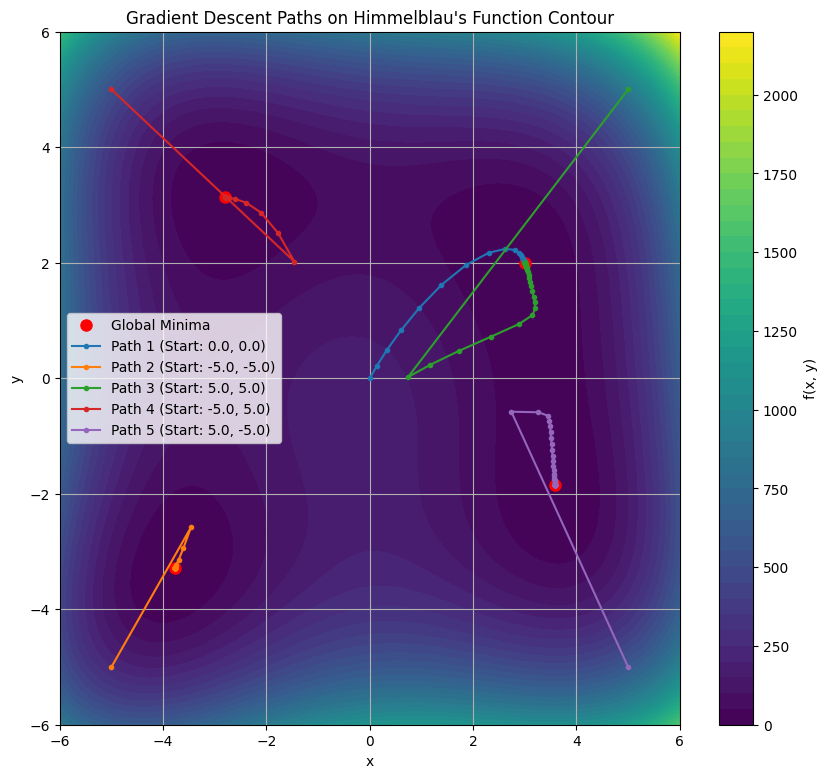


Gradient Descent Final Points and Function Values:
Start Point [0. 0.]: Final Point (3.0000, 2.0000), f(x,y) = 0.0000
Start Point [-5. -5.]: Final Point (-3.7793, -3.2832), f(x,y) = 0.0000
Start Point [5. 5.]: Final Point (3.0000, 2.0000), f(x,y) = 0.0000
Start Point [-5.  5.]: Final Point (-2.8051, 3.1313), f(x,y) = 0.0000
Start Point [ 5. -5.]: Final Point (3.5844, -1.8481), f(x,y) = 0.0000


In [9]:
# Define starting points, learning rate, and number of iterations
starting_points = [
    np.array([0.0, 0.0]),     # Near the center
    np.array([-5.0, -5.0]),   # Bottom-left
    np.array([5.0, 5.0]),     # Top-right
    np.array([-5.0, 5.0]),    # Top-left
    np.array([5.0, -5.0])     # Bottom-right
]
learning_rate = 0.01
n_iterations = 100

# Plotting the contour lines again with gradient descent paths
plt.figure(figsize=(10, 9))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Paths on Himmelblau\'s Function Contour')

# Mark the known minima
minima = [
    (3.0, 2.0),
    (-2.805118, 3.131312),
    (-3.779310, -3.283186),
    (3.584428, -1.848126)
]
for min_x, min_y in minima:
    plt.plot(min_x, min_y, 'ro', markersize=8, label='Global Minima' if (min_x, min_y) == minima[0] else "")

# Run gradient descent from various starting points and plot paths
for i, start_point in enumerate(starting_points):
    path = gradient_descent(start_point, learning_rate, n_iterations)
    plt.plot(path[:, 0], path[:, 1], marker='o', markersize=3, linestyle='-', label=f'Path {i+1} (Start: {start_point[0]:.1f}, {start_point[1]:.1f})')
    # No separate label for the end point to keep the legend concise

plt.legend()
plt.grid(True)
plt.show()

# Print the final points and their function values
print("\nGradient Descent Final Points and Function Values:")
for i, start_point in enumerate(starting_points):
    path = gradient_descent(start_point, learning_rate, n_iterations)
    final_x, final_y = path[-1]
    final_value = himmelblau(final_x, final_y)
    print(f"Start Point {start_point}: Final Point ({final_x:.4f}, {final_y:.4f}), f(x,y) = {final_value:.4f}")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Himmelblau's function
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Create a grid of x and y values for plotting
x_range = np.linspace(-6, 6, 400)
y_range = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = himmelblau(X, Y)

### 3D Visualization of Himmelblau's Function

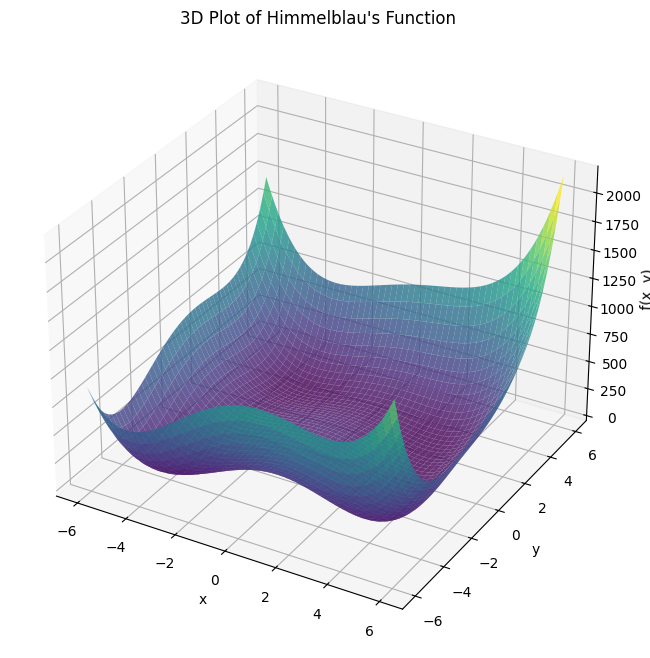

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Plot of Himmelblau\'s Function')
plt.show()

### Contour Plot of Himmelblau's Function

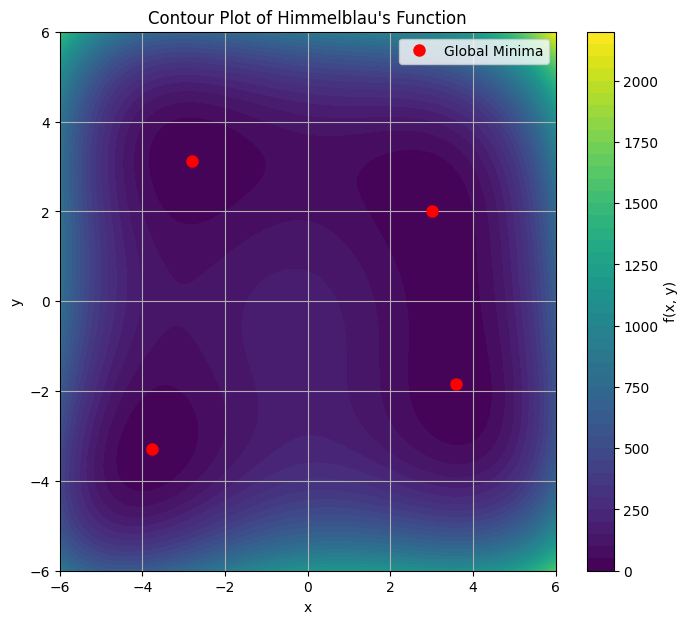

In [7]:
# Plotting the contour lines
plt.figure(figsize=(8, 7))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Himmelblau\'s Function')

# Mark the known minima
minima = [
    (3.0, 2.0),
    (-2.805118, 3.131312),
    (-3.779310, -3.283186),
    (3.584428, -1.848126)
]
for min_x, min_y in minima:
    plt.plot(min_x, min_y, 'ro', markersize=8, label='Global Minima' if (min_x, min_y) == minima[0] else "")

plt.legend()
plt.grid(True)
plt.show()

## 5. Results and Interpretation

The surface structure illustrates the inherent difficulty of multimodal optimization. Multiple basins of attraction imply that convergence depends strongly on initialization and optimizer dynamics.

This behavior closely mirrors challenges encountered in molecular conformational searches and large-scale machine learning models, where multiple locally optimal solutions may exist.


## 6. Conclusion and Extensions

Himmelblau’s function complements narrow-valley benchmarks by emphasizing multimodal complexity. Together with the Rosenbrock function, it forms a foundational classical baseline set for evaluating optimization strategies.

Future work will extend this benchmark to:

- Quantum annealing formulations  
- Variational quantum optimization methods (VQE, QAOA)  
- Hybrid quantum–classical optimization pipelines  

Establishing strong classical references is essential for rigorously assessing any potential quantum advantage.


**References & Study Resources**

1. Optimization: https://en.wikipedia.org/wiki/Mathematical_optimization
2. Convex Optimization: https://en.wikipedia.org/wiki/Convex_optimization
3. Contrained Optimization -Lagrange Multipliers: https://en.wikipedia.org/wiki/Lagrange_multiplier
4. Unconstrained Optimization: https://www.mathworks.com/help/optim/ug/unconstrained-nonlinear-optimization-algorithms.html
5. Gradient Descent: https://en.wikipedia.org/wiki/Gradient_descent
6. Rosenbrock function: https://www.sfu.ca/~ssurjano/rosen.html
7. Rosenbrock function: https://en.wikipedia.org/wiki/Rosenbrock_function
8. Himmelblau test function: https://en.wikipedia.org/wiki/Himmelblau%27s_function
9.Test Functions for Benchmarking: https://en.wikipedia.org/wiki/Test_functions_for_optimization